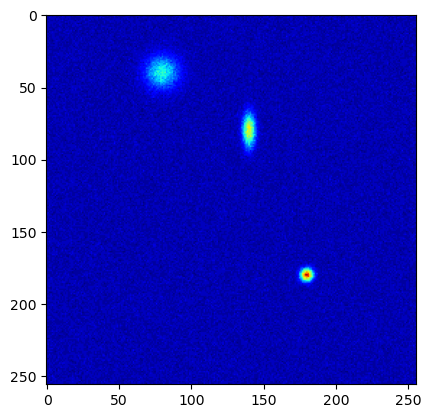

In [1]:
import opticiq as iq
from opticiq import gen
from matplotlib import pyplot as plt

# === Demo 1; multiple Gaussian beams in a noisy field ===
I00 = gen.gaussian(256, 12, 8, center=(80, 40)) + gen.gaussian(256, 20, (3, 8),center=(140, 80)) + gen.gaussian(256, 30, 3, center=(180, 180))
I0 = gen.image_transfer_simple(I00, poisson=.1, darklevel=3).astype(int)
plt.imshow(I0, cmap='jet')

<Axes: >

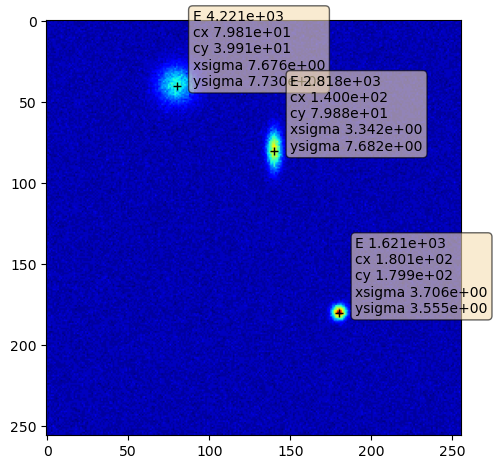

In [2]:
# recipe_star2 has a good set of signal processing for star finding or beam finding
# 2 pass peak finding with a down-selection in between
# and background subtraction
imG, roi, peaks, xdata = iq.recipe_star2(I0.astype(float), 12, E_amin=5, E_rmin=.01)
iq.peaksPlotter(roi, I0, peaks)

In [3]:
# peaks is the output data; integrated energy, centroids, and sigmas
print(peaks)

{'E': array([4221., 2818., 1621.]), 'cx': array([ 79.80644397, 139.98935415, 180.08266502]), 'cy': array([ 39.91068467,  79.8807665 , 179.91918569]), 'xsigma': array([7.67620717, 3.3418694 , 3.70595024]), 'ysigma': array([7.72963738, 7.68160628, 3.55466809])}


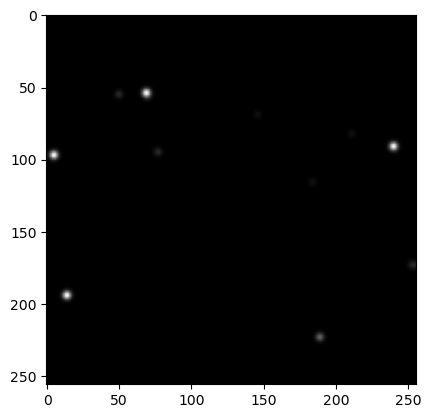

In [4]:
# === Demo 2; stars of various magnitudes, less noise than before ===
I00 = gen.genstarfield(256, 12, 2)
I0 = gen.image_transfer_simple(I00, poisson=.05, darklevel=2)
plt.imshow(I0, cmap='gray')

In [5]:
imG, roi, peaks, xdata = iq.recipe_star2(I0, 5, .02, E_amin=2, E_rmin=.0005)
print(len(roi))

10


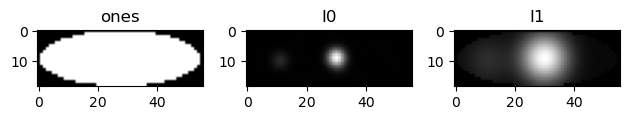

<Figure size 640x480 with 0 Axes>

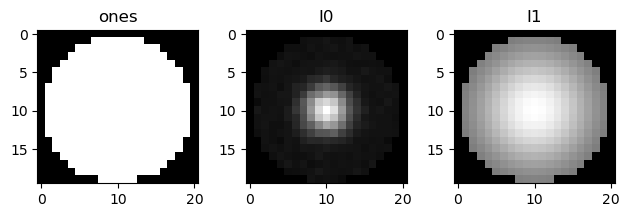

<Figure size 640x480 with 0 Axes>

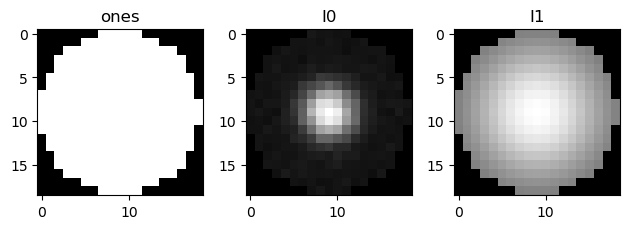

<Figure size 640x480 with 0 Axes>

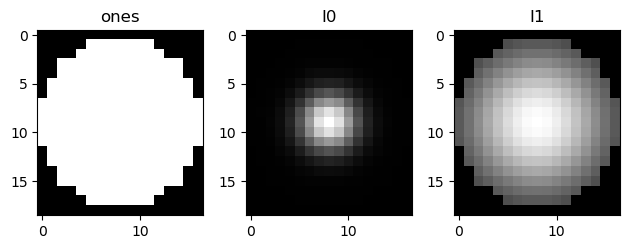

<Figure size 640x480 with 0 Axes>

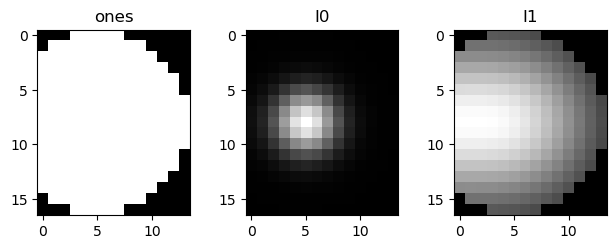

<Figure size 640x480 with 0 Axes>

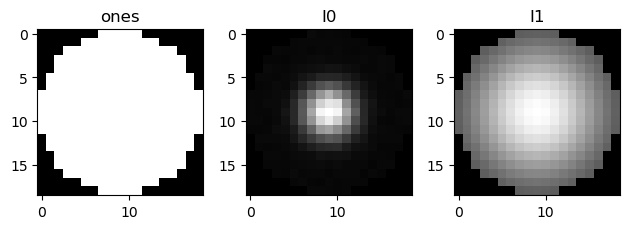

<Figure size 640x480 with 0 Axes>

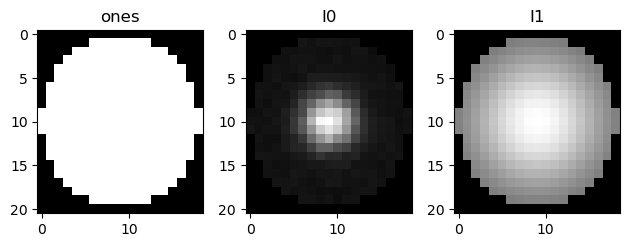

<Figure size 640x480 with 0 Axes>

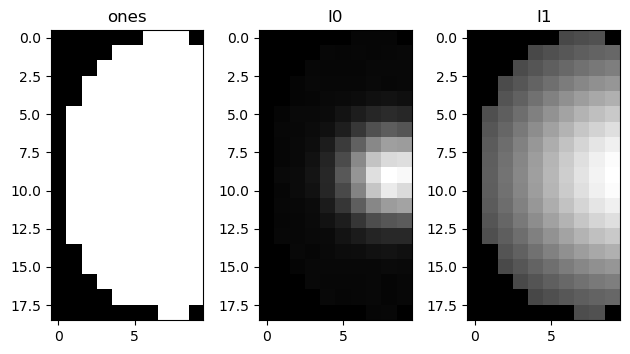

<Figure size 640x480 with 0 Axes>

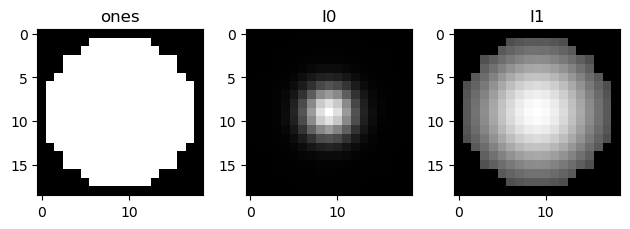

<Figure size 640x480 with 0 Axes>

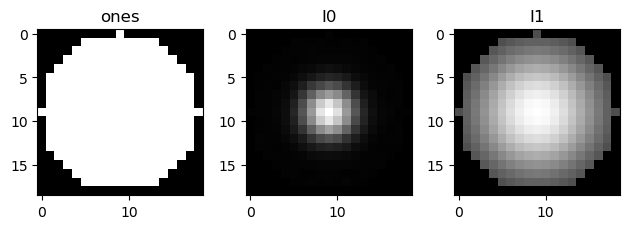

<Figure size 640x480 with 0 Axes>

In [6]:
# get a close look at each star that was found
for i in range(len(roi)):
    roi.plot_k(i, imG)